# Netflix DataSet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
movie_data = pd.read_csv("/home/somyajain/Downloads/archive/raw_titles.csv")

In [4]:
movie_data.head()

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


# Data Cleaning

**Creating a standard database and preparing for analysis by:**
1) Removing columns not relevant for our analysis
2) Renaming columns as per requirement 
3) Removing data with null values as much as possible

In [5]:
movie_data.drop(["index","id","imdb_id"], axis = 1, inplace = True)

In [6]:
movie_data.rename(columns = {"SCORE":"IMDb SCORE"}, inplace = True)

In [7]:
movie_data.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,8.1,391942.0


In [8]:
# checking null items present in the dataset
movie_data.isnull().sum()

title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_score               523
imdb_votes               539
dtype: int64

In [9]:
# To identify title with null entry 

movie_data[movie_data["title"].isnull()==True]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
1805,NaN,MOVIE,2015,NaN,11,[],[],NaN,NaN,NaN


In [10]:
# removing that row using its index

movie_data.drop(1805,axis=0, inplace=True)

In [11]:
movie_data["title"].isnull().sum()

0

In [12]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5805 entries, 0 to 5805
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5805 non-null   object 
 2   release_year          5805 non-null   int64  
 3   age_certification     3196 non-null   object 
 4   runtime               5805 non-null   int64  
 5   genres                5805 non-null   object 
 6   production_countries  5805 non-null   object 
 7   seasons               2047 non-null   float64
 8   imdb_score            5283 non-null   float64
 9   imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 498.9+ KB


In [13]:
# Removing rows without IMDb scores and voters
movie_data.dropna(subset = ['imdb_score','imdb_votes'], inplace = True)

In [14]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5267 entries, 1 to 5805
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5267 non-null   object 
 1   type                  5267 non-null   object 
 2   release_year          5267 non-null   int64  
 3   age_certification     2989 non-null   object 
 4   runtime               5267 non-null   int64  
 5   genres                5267 non-null   object 
 6   production_countries  5267 non-null   object 
 7   seasons               1876 non-null   float64
 8   imdb_score            5267 non-null   float64
 9   imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 452.6+ KB


# Data Analysis

1) Identification of combination of production_countries scoring highest mean imdb score
2) Number of shows and movies in the database
3) Number of shows without prequel or sequel
4) Comparison of number of shows with movies released since 1950
5) Highest rated shows and movies of all times
6) Count of shows under drama genre
7) Count of shows that were produced across globe from 2019 to 2022
8) % of total no. of shows streamed on netflix that were produced in US and were released in btw 2019 to 2022
9) % of total movies produced in US
10) Count of movies and shows lying under each genre
11) Count of movies and shows produced in each country
12) List of countries producing more than 100 movies and shows

In [15]:
movie_data['production_countries'].nunique()

421

In [16]:
md = movie_data.groupby('production_countries')['imdb_score'].mean()
md.head()

production_countries
['AE', 'LB']                            6.733333
['AE', 'SA', 'SY']                      5.400000
['AE']                                  4.910000
['AO', 'ZA']                            3.900000
['AR', 'BR', 'DK', 'FR', 'DE', 'PL']    6.300000
Name: imdb_score, dtype: float64

In [17]:
md.sort_values(ascending = False).head() 


production_countries
['UA', 'GB', 'US']    8.3
['CU', 'US']          8.3
['CD', 'GB']          8.2
['US', 'DE', 'GB']    8.1
['GB', 'US', 'EG']    8.1
Name: imdb_score, dtype: float64

**8.3 is the highest mean imdb score of any combination of production_countries, count of which is 1 in this case** 

In [18]:
#movie_data['production_countries'].unique()

In [19]:
movie_filter1 = movie_data[movie_data['production_countries'] == "['UA', 'GB', 'US']"]

In [20]:
movie_filter1.shape

(1, 10)

In [21]:
# Number of unique shows and movies
movie_data.groupby('type')['title'].count()

type
MOVIE    3391
SHOW     1876
Name: title, dtype: int64

In [22]:
# Number of shows with multiple seasons
movie_data2=movie_data.copy
movie_data['seasons'].nunique()

23

In [23]:
movie_data.where((movie_data['type']=='SHOW') & (movie_data['seasons'] != "NaN"))['title'].nunique()

1871

In [24]:
md1 = movie_data[(movie_data['type']=='SHOW') & (movie_data['seasons'] != "NaN")]
md1.shape

(1876, 10)

In [25]:
#md['title'].drop_duplicates(keep = 'first' ,inplace = True)
md1.drop_duplicates('title',keep = 'first' ,inplace = True)

/tmp/ipykernel_3049/3016167218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md1.drop_duplicates('title',keep = 'first' ,inplace = True)


In [26]:
md1['title'].nunique()

1871

In [27]:
md1.head(2)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,8.8,72895.0
29,Monty Python's Fliegender Zirkus,SHOW,1972,TV-MA,43,['comedy'],[],1.0,8.1,2144.0


**1871 shows have neither prequel nor sequel**

<AxesSubplot: xlabel='release_year'>

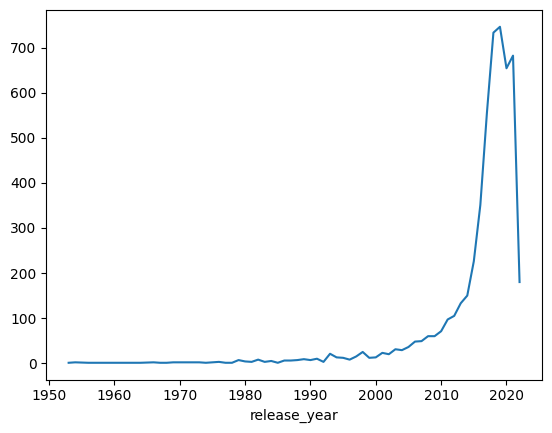

In [28]:
movie_data.groupby('release_year').title.count().plot()

In [29]:
show = movie_data['type']=="SHOW"
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5267 entries, 1 to 5805
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5267 non-null   object 
 1   type                  5267 non-null   object 
 2   release_year          5267 non-null   int64  
 3   age_certification     2989 non-null   object 
 4   runtime               5267 non-null   int64  
 5   genres                5267 non-null   object 
 6   production_countries  5267 non-null   object 
 7   seasons               1876 non-null   float64
 8   imdb_score            5267 non-null   float64
 9   imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 452.6+ KB


In [30]:
md2 = movie_data[(movie_data['type']=='MOVIE')]

In [31]:
md2.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,8.1,391942.0
6,Dirty Harry,MOVIE,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,7.7,153463.0


In [32]:
show = movie_data[(movie_data['type']=='SHOW')]
show.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,8.8,72895.0
29,Monty Python's Fliegender Zirkus,SHOW,1972,TV-MA,43,['comedy'],[],1.0,8.1,2144.0
47,Seinfeld,SHOW,1989,TV-PG,24,['comedy'],['US'],9.0,8.9,302700.0
55,Knight Rider,SHOW,1982,TV-PG,51,"['action', 'scifi', 'crime', 'drama']",['US'],4.0,6.9,33760.0
57,Thomas & Friends,SHOW,1984,TV-Y,10,"['family', 'comedy', 'music', 'action', 'anima...",['GB'],24.0,6.5,4948.0


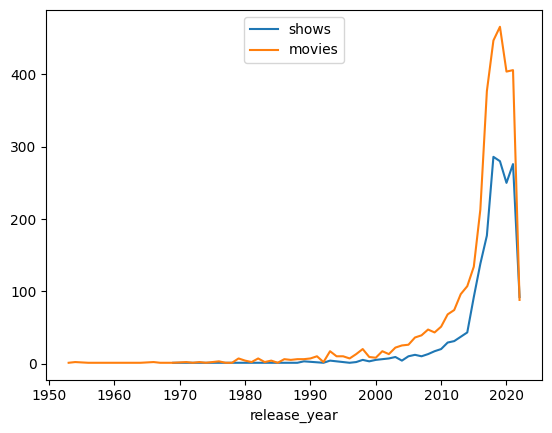

In [140]:
show.groupby('release_year').title.count().plot(label = "shows")
md2.groupby('release_year').title.count().plot(label = "movies")
leg = plt.legend(loc='upper center')
plt.show()

**Over the years number of movies produced were more than shows produced**

In [34]:
show['imdb_score'].max()

9.6

In [35]:
show[show['imdb_score']==9.6]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
656,Khawatir,SHOW,2005,TV-14,20,['reality'],[],11.0,9.6,3046.0
2927,#ABtalks,SHOW,2018,TV-PG,68,[],[],1.0,9.6,7.0


**Khawatir and ABtalks are the highest rated shows of all times with imdb rating of 9.6 each**

In [36]:
md2[md2['imdb_score']==md2['imdb_score'].max()]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
25,No Longer Kids,MOVIE,1979,NaN,235,"['comedy', 'drama']",['EG'],NaN,9.0,943.0
876,Chhota Bheem & Krishna in Mayanagari,MOVIE,2011,G,66,"['animation', 'action', 'fantasy']",['IN'],NaN,9.0,5.0
2814,C/o Kancharapalem,MOVIE,2018,PG,152,['drama'],['IN'],NaN,9.0,6562.0
3352,David Attenborough: A Life on Our Planet,MOVIE,2020,PG,83,['documentation'],['GB'],NaN,9.0,31180.0


**4 movies are the highest rated movies of all times with imdb rating of 9.0 each**

In [37]:
movie_data['genres'].unique()

array(["['crime', 'drama']", "['comedy', 'fantasy']", "['comedy']", ...,
       "['crime', 'comedy', 'drama', 'thriller', 'action']",
       "['music', 'romance', 'comedy']",
       "['family', 'comedy', 'animation']"], dtype=object)

# 
**Count of shows and movies genre-wise:**

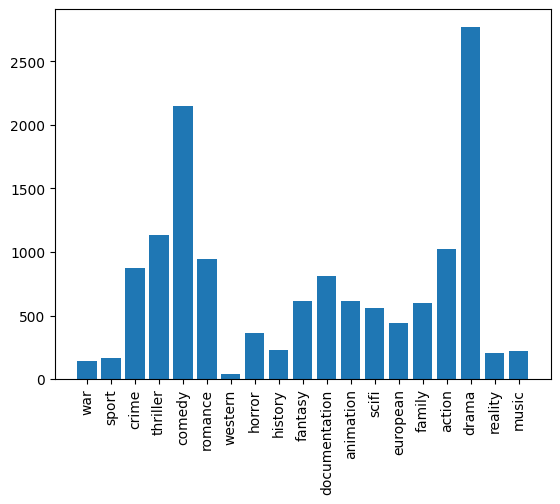

In [146]:
ger = []
data = list(movie_data['genres'])
for i in range(1, len(movie_data['genres'])):
    k = data[i][2:-2].split("', '")
    ger.extend(k)
gl = list(set(ger))
dict = {}
for j in range(len(gl)):
    g = gl[j]
    count_genre = 0
    if g != '':
        for i in range(len(data)):
             if (g in data[i]): 
                count_genre += 1 
             else: 
                count_genre = count_genre 
                dict[g] = count_genre
    else: 
        continue
        
names = list(dict.keys())
values = list(dict.values())

plt.bar(range(len(dict)), values)
plt.xticks(range(len(dict)),names, rotation='vertical')
plt.show()

#
**Count of shows and movies production_country wise:**

In [139]:
prod_countries = []
data_prod = list(movie_data['production_countries'])
for i in range(1, len(movie_data['production_countries'])):
    a = data_prod[i][2:-2].split("', '")
    prod_countries.extend(a)
pl = list(set(prod_countries))
dict_prod = {}
for j in range(len(pl)):
    p = pl[j]
    count_prod = 0
    if p != '':
        for i in range(len(data_prod)):
             if (p in data_prod[i]): 
                count_prod += 1 
             else: 
                count_prod = count_prod 
                dict_prod[p] = count_prod
    else: 
        continue
dict_prod

{'GL': 1,
 'MU': 1,
 'KR': 188,
 'CD': 2,
 'CA': 192,
 'AO': 1,
 'CL': 17,
 'LU': 7,
 'AT': 11,
 'TH': 32,
 'TW': 54,
 'VE': 1,
 'FO': 1,
 'NP': 1,
 'LT': 2,
 'SA': 11,
 'KH': 3,
 'AR': 66,
 'HU': 6,
 'PR': 2,
 'BY': 1,
 'QA': 10,
 'PH': 80,
 'MW': 1,
 'RU': 15,
 'PK': 3,
 'VN': 2,
 'MA': 5,
 'IE': 16,
 'GE': 1,
 'UA': 4,
 'AE': 19,
 'NO': 21,
 'BG': 6,
 'IS': 10,
 'RO': 6,
 'BE': 46,
 'IR': 2,
 'IL': 15,
 'EG': 35,
 'FR': 233,
 'KW': 6,
 'RS': 2,
 'PL': 38,
 'BR': 94,
 'CY': 1,
 'IO': 2,
 'GR': 2,
 'GT': 1,
 'IN': 595,
 'TN': 1,
 'CZ': 7,
 'PS': 13,
 'FI': 7,
 'JO': 6,
 'TR': 78,
 'HR': 1,
 'ZW': 1,
 'BF': 1,
 'NG': 63,
 'SY': 2,
 'CM': 2,
 'SE': 30,
 'DE': 130,
 'UY': 7,
 'XX': 23,
 'SN': 2,
 'SK': 1,
 'KG': 1,
 'MX': 112,
 'SG': 22,
 'JP': 262,
 'BD': 3,
 'BS': 1,
 'PY': 1,
 'CH': 12,
 'CU': 1,
 'IQ': 2,
 'AL': 2,
 'PT': 5,
 'Lebanon': 1,
 'GB': 375,
 'CO': 40,
 'VA': 1,
 'NL': 35,
 'HK': 38,
 'LB': 30,
 'DZ': 1,
 'US': 2143,
 'ZA': 37,
 'IT': 77,
 'PE': 10,
 'MY': 14,
 'MZ': 1,
 'E

**#Countries with more than 100 movies/shows produced:**

In [137]:
#Method 1:
top_countries = []
for item in dict_prod.items():
    if item[1] > 100:
        top_countries.append(item[0])
    else:
        continue
top_countries

['KR', 'CA', 'FR', 'IN', 'DE', 'MX', 'JP', 'GB', 'US', 'ES']

In [135]:
# method 2: 
[key for (key, val) in dict_prod.items() if val > 100]

['KR', 'CA', 'FR', 'IN', 'DE', 'MX', 'JP', 'GB', 'US', 'ES']

In [41]:
md1[md1['genres'].str.contains('drama')].count() 

title                   977
type                    977
release_year            977
age_certification       886
runtime                 977
genres                  977
production_countries    977
seasons                 977
imdb_score              977
imdb_votes              977
dtype: int64

In [42]:
md1[md1['release_year']>2018]['genres'].str.contains('drama').count() 

896

In [43]:
show[show['release_year']>2018]['genres'].str.contains('drama').count()

898

In [44]:
show[show['release_year']>2018]['production_countries'].str.contains('US').count()
 
movie_data[(movie_data['type']=='SHOW')].count()

title                   1876
type                    1876
release_year            1876
age_certification       1670
runtime                 1876
genres                  1876
production_countries    1876
seasons                 1876
imdb_score              1876
imdb_votes              1876
dtype: int64

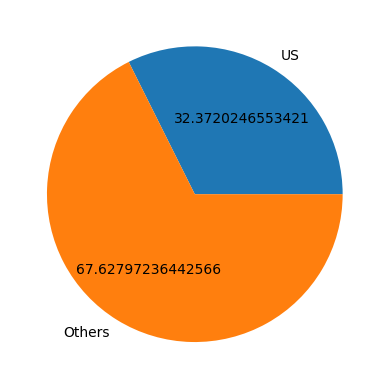

In [45]:
plt.pie([898,1876], labels = ['US','Others'], autopct=str)
plt.show() 

1) **977 shows have been produced over the years under drama genre across globe, out of which 896 shows were produced between 2019 and 2022**
2) **2 additional seasons were produced of the already running shows under drama genre in this period**
3) **32.37% of total shows streamed on netflix were produced in US from 2019 to 2022** 

In [46]:
md2[md2['production_countries'].str.contains('US')].count() 

title                   1390
type                    1390
release_year            1390
age_certification        780
runtime                 1390
genres                  1390
production_countries    1390
seasons                    0
imdb_score              1390
imdb_votes              1390
dtype: int64

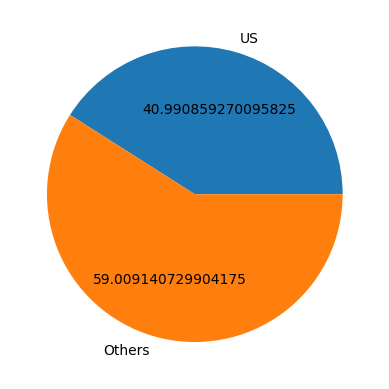

In [47]:
plt.pie([1390,(3391-1390)], labels = ['US','Others'], autopct=str)
 
plt.show()

# 
1) **~41% of total movies were produced in US**
2) **1390 movies have been produced in US so far as per this dataset**

# Finding relations

array([[<AxesSubplot: xlabel='runtime', ylabel='runtime'>,
        <AxesSubplot: xlabel='imdb_score', ylabel='runtime'>,
        <AxesSubplot: xlabel='imdb_votes', ylabel='runtime'>],
       [<AxesSubplot: xlabel='runtime', ylabel='imdb_score'>,
        <AxesSubplot: xlabel='imdb_score', ylabel='imdb_score'>,
        <AxesSubplot: xlabel='imdb_votes', ylabel='imdb_score'>],
       [<AxesSubplot: xlabel='runtime', ylabel='imdb_votes'>,
        <AxesSubplot: xlabel='imdb_score', ylabel='imdb_votes'>,
        <AxesSubplot: xlabel='imdb_votes', ylabel='imdb_votes'>]],
      dtype=object)

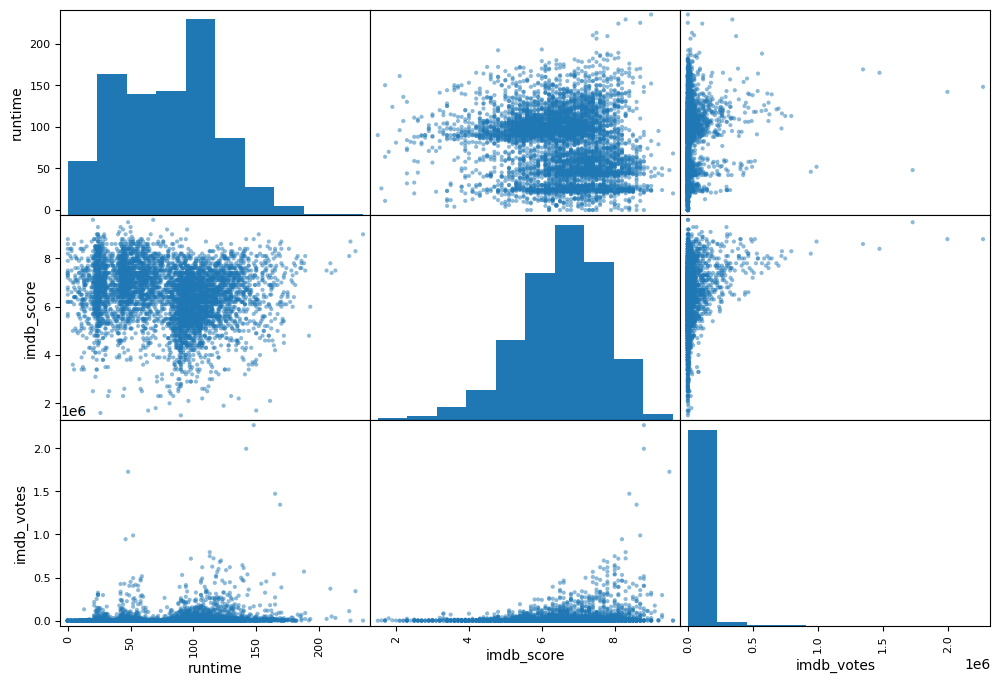

In [48]:
inp_attributes = ['runtime','imdb_score','imdb_votes']
from pandas.plotting import scatter_matrix

scatter_matrix(movie_data[inp_attributes], figsize=(12,8))

In [49]:
corr_matrix=movie_data.corr()

corr_matrix["imdb_score"].sort_values(ascending=False)

/tmp/ipykernel_3049/2719294395.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=movie_data.corr()


imdb_score      1.000000
imdb_votes      0.189954
seasons         0.097727
release_year   -0.102952
runtime        -0.158390
Name: imdb_score, dtype: float64

In [50]:
corr_matrix=movie_data.corr()

corr_matrix["imdb_votes"].sort_values(ascending=False)

/tmp/ipykernel_3049/3025428467.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=movie_data.corr()


imdb_votes      1.000000
seasons         0.212645
imdb_score      0.189954
runtime         0.138610
release_year   -0.196988
Name: imdb_votes, dtype: float64

In [51]:
st = str(movie_data['genres'][1])
st
# count = (st.count(', ') + 1)
# re.split(r'(\[|])[,]',st)

"['crime', 'drama']"

In [52]:
set(st[1:-2].split(', '))

{"'crime'", "'drama"}

**No strong quantitative relations found between any of the given parameters**